# Método de Perturbación

# (El Modelo de Ciclos Económicos Reales)

Mauricio Tejada

ILADES - Universidad Alberto Hurtado


In [29]:
# Paquetes necesarios

using NLsolve
using LaTeXStrings
using Statistics
using Plots
gr()

Plots.GRBackend()

## El Problema de Optimización

Hasen (1985): El problema de optimización del planificador central es el siguiente:

\begin{array}{rcl}
\max U_{0} & = & \sum_{t=0}^{\infty}\beta^{t}\left(\ln C_{t}-AN_{t}\right)\\
s.a &  & C_{t}+I_{t}=Z_{t}K_{t}^{\alpha}N_{t}^{1-\alpha}\\
 &  & K_{t+1}=I_{t}+(1-\delta)K_{t}\\
 &  & \ln Z_{t+1}=\rho\ln Z_{t}+\epsilon_{t+1}\,\,\,\epsilon_{t+1}\sim N(0,\sigma)\\
 &  & K_{0},Z_{0}\,dado.
\end{array}

Alternativamente:

\begin{array}{rcl}
\max U_{0} & = & \sum_{t=0}^{\infty}\beta^{t}\left(\ln C_{t}-AN_{t}\right)\\
s.a &  & C_{t}+K_{t+1}=Z_{t}K_{t}^{\alpha}N_{t}^{1-\alpha}+(1-\delta)K_{t}\\
 &  & \ln Z_{t+1}=\rho\ln Z_{t}+\epsilon_{t+1}\,\,\,\epsilon_{t+1}\sim N(0,\sigma)\\
 &  & K_{0},Z_{0}\,dado.
\end{array}

## Condiciones de Optimalidad

El lagranjeano intertemporal en valor presente:

$$L=\sum_{t=0}^{\infty}\beta^{t}\left[\ln C_{t}-AN_{t}+\lambda_{t}\left(Z_{t}K_{t}^{\alpha}N_{t}^{1-\alpha}+(1-\delta)K_{t}-C_{t}-K_{t+1}\right)\right]$$

Condiciones de primer orden:

\begin{array}{rcl}
\frac{\partial L}{\partial C_{t}} & : & \beta^{t}\left[\frac{1}{C_{t}}-\lambda_{t}\right]=0\\
\frac{\partial L}{\partial N_{t}} & : & \beta^{t}\left[-A+\lambda_{t}(1-\alpha)Z_{t}K_{t}^{\alpha}N_{t}^{1-\alpha}\right]\\
\frac{\partial L}{\partial K_{t+1}} & : & -\beta^{t}\lambda_{t}+\beta^{t+1}E_{t}\left[\lambda_{t+1}\left(\alpha Z_{t+1}K_{t+1}^{\alpha-1}N_{t+1}^{1-\alpha}+1-\delta\right)\right]\\
\frac{\partial L}{\partial\lambda_{t}} & : & Z_{t}K_{t}^{\alpha}N_{t}^{1-\alpha}+(1-\delta)K_{t}-C_{t}-K_{t+1}=0
\end{array}

Tenemos el siguiente sistema de ecuaciones en diferencias (no lineal):

\begin{array}{rcl}
\frac{1}{C_{t}} & = & \beta E_{t}\left[\frac{1}{C_{t+1}}\left(\alpha Z_{t+1}K_{t+1}^{\alpha-1}N_{t+1}^{1-\alpha}+1-\delta\right)\right]\\
A & = & \frac{(1-\alpha)Z_{t}K_{t}^{\alpha}N_{t}^{-\alpha}}{C_{t}}\\
C_{t}+K_{t+1} & = & Z_{t}K_{t}^{\alpha}N_{t}^{1-\alpha}+(1-\delta)K_{t}\\
\ln Z_{t+1} & = & \rho\ln Z_{t}+\epsilon_{t+1}
\end{array}

## Estado Estacionario

Entonces el estado estacionario resuelve (usamos $Z^*=1$):

\begin{array}{rcl}
1 & = & \beta\left[\alpha K^{*\alpha-1}N^{*1-\alpha}+1-\delta\right]\\
A & = & \frac{(1-\alpha)K^{*\alpha}N^{*-\alpha}}{C^{*}}\\
C^{*} & = & K^{*\alpha}N^{*1-\alpha}-\delta K^{*}
\end{array}

Para el cálculo del estado estacionario definimos primero los parámetros del modelo:

In [2]:
# Parametros del modelo

α   = 0.36    # Participacion del capital
δ   = 0.025   # Tasa de depreciacion
β   = 1/1.01  # Tasa de descuento (compatible con 1% de tasa de retorno)
ρ   = 0.95    # Coeficiente de autocorrelaci?n del shock tecnologico
σ   = 0.712   # Desviacion estandar del shock tecnologico  (Unidades: %)
A   = 2.5846  # Parametro de la funci?n de utilidad
zee = 1;      # Normalizacion
η = [0; 1];   # Perturbación

Para calcular el estado estacionario del modelo, generamos el sistema de ecuaciones: 

In [3]:
# Sistema de ecuaciones que resuelve por el estado estacionario

function fee(x)
    
    fval = similar(x)
    
    fval[1] = β*(α*zee*(x[1]^(α-1))*(x[2]^(1-α))+(1-δ)) - 1
    fval[2] = A - ((1-α)*zee*(x[1]^α)*(x[2]^(-α))/x[3])
    fval[3] = zee*(x[1]^α)*(x[2]^(1-α)) - δ*x[1] - x[3]
    
    return fval
end

fee (generic function with 1 method)

Usamos la función NLsolve de Julia:

In [4]:
solee = nlsolve(fee, [0.5, 0.5, 0.5], inplace = false)

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.5, 0.5, 0.5]
 * Zero: [12.720309212740371, 0.3333353174721278, 0.9186889986979181]
 * Inf-norm of residuals: 0.000000
 * Iterations: 14
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 15
 * Jacobian Calls (df/dx): 13

In [5]:
xout = solee.zero
funv = fee(xout);

print("Estado Estacionario: $xout \n")
print("Valor de la Función en Estado Estacionario: $funv")

Estado Estacionario: [12.720309212740371, 0.3333353174721278, 0.9186889986979181] 
Valor de la Función en Estado Estacionario: [0.0, 2.6645352591003757e-15, -6.661338147750939e-16]

Estado estacionario:

In [6]:
kee   = xout[1]
nee   = xout[2]
cee   = xout[3]
yee   = zee*(kee^α)*(nee^(1-α))
lamee = 1/cee
ree   = α*zee*(kee^(α-1))*(nee^(1-α))+(1-δ);

## Método de Perturbación

In [7]:
# Incluímos funciones necesarias para aplicar el método de perturbación
include("second_order_approx.jl");

Escribimos las ecuaciones del modelo 

\begin{array}{rcl}
\frac{1}{C_{t}} & = & \beta E_{t}\left[\frac{1}{C_{t+1}}\left(\alpha Z_{t+1}K_{t+1}^{\alpha-1}N_{t+1}^{1-\alpha}+1-\delta\right)\right]\\
A & = & \frac{(1-\alpha)Z_{t}K_{t}^{\alpha}N_{t}^{-\alpha}}{C_{t}}\\
C_{t}+K_{t+1} & = & Z_{t}K_{t}^{\alpha}N_{t}^{1-\alpha}+(1-\delta)K_{t}\\
\ln Z_{t+1} & = & \rho\ln Z_{t}+\epsilon_{t+1}
\end{array}

en la forma:

$$E_t f(x_{t+1},x_t,y_{t+1},y_t)$$

In [8]:
# Número de variables y shocks
nx = 2; # variables de estado k z
ny = 2; # variables de control c n
ne = 1; # shock eps

# Definimos el modelo. Orden de variables
# k’ z’ c’ n' k z c n 
# 1  2  3  4  5 6 7 8 
# las variables serán definidas en logs

ecu1(x) = (1/exp(x[7])) - β*(1/exp(x[3]))*(α*exp(x[2])*(exp(x[1])^(α-1))*(exp(x[4])^(1-α))+1-δ)
ecu2(x) = A - (1-α)*(exp(x[6])*(exp(x[5])^α)*(exp(x[8])^(-α)))/exp(x[7])
ecu3(x) = exp(x[7]) + exp(x[1]) - exp(x[6])*(exp(x[5])^α)*(exp(x[8])^(1-α)) - (1-δ)*exp(x[5])
ecu4(x) = x[2] - ρ*x[6];

sistema = (ecu1,ecu2,ecu3,ecu4);

# Vector de varaibles en estado estacionario 
xee = [log(kee) log(zee ) log(cee) log(nee) log(kee) log(zee ) log(cee) log(nee)]

1×8 Array{Float64,2}:
 2.5432  0.0  -0.0848076  -1.09861  2.5432  0.0  -0.0848076  -1.09861

Las matrices Jacobiana y Hesiana del sistema se pueden hallar usando la función `compute_gradient_hessian`. Internamente, la función utiliza el paquete `ForwardDiff`.

In [9]:
# Calculando las matrices jacobiana y hesiana del sistema
J, H = compute_gradient_hessian(sistema,xee);

In [10]:
J

4×8 Array{Float64,2}:
  0.0241412  -0.0377206   1.08851  …  -0.0     -1.08851   -0.0
 -0.0        -0.0        -0.0         -2.5846   2.5846     0.930456
 12.7203      0.0         0.0         -1.2367   0.918689  -0.791486
  0.0         1.0         0.0         -0.95     0.0        0.0

In [11]:
H

64×4 Array{Float64,2}:
 -0.0154503  -0.0       12.7203    0.0
  0.0241412  -0.0        0.0       0.0
 -0.0241412  -0.0        0.0       0.0
  0.0154503  -0.0        0.0       0.0
  0.0        -0.0        0.0       0.0
  0.0        -0.0        0.0       0.0
  0.0        -0.0        0.0       0.0
  0.0        -0.0        0.0       0.0
  0.0241412  -0.0        0.0       0.0
 -0.0377206  -0.0        0.0       0.0
  0.0377206  -0.0        0.0       0.0
 -0.0241412  -0.0        0.0       0.0
  0.0        -0.0        0.0       0.0
  ⋮                                
  0.0         0.930456   0.0       0.0
  0.0         2.5846     0.0       0.0
  1.08851    -2.5846     0.918689  0.0
  0.0        -0.930456   0.0       0.0
  0.0        -0.0        0.0       0.0
  0.0        -0.0        0.0       0.0
  0.0        -0.0        0.0       0.0
  0.0        -0.0        0.0       0.0
  0.0         0.334964  -0.284935  0.0
  0.0         0.930456  -0.791486  0.0
  0.0        -0.930456   0.0       0.0
  0.0

## Aproximación de primer orden

La aproximación de la solución es:

$$
\begin{array}{l}
g(x, \sigma)=g(\bar{x}, 0)+g_{x}(\bar{x}, 0)(x-\bar{x})+g_{\sigma}(\bar{x}, 0) \sigma \\
h(x, \sigma)=h(\bar{x}, 0)+h_{x}(\bar{x}, 0)(x-\bar{x})+h_{\sigma}(\bar{x}, 0) \sigma
\end{array}
$$

pero recordemos que en la solución $g_{\sigma}(\bar{x}, 0)=0$ y $h_{\sigma}(\bar{x}, 0)=0$. Usamos la función `solve_first_order_approx` para resolver por las funciones de política. Los resultados de la función son los siguientes:

- $Gs = g(\bar{x}, 0)$ Estado estacionario de las variables de control.
- $Hs = h(\bar{x}, 0)$ Estado Estacionario de las variables de estado.
- $Gx = g_{x}(\bar{x}, 0)$
- $Hx = h_{x}(\bar{x}, 0)$

In [12]:
# Solución usando una aproximación de primer orden
Gs,Hs,Gx,Hx = solve_first_order_approx(xee,J,nx,ny,ne);

In [13]:
Gs

2-element Array{Float64,1}:
 -0.08480762663445608
 -1.0986063362694418

In [14]:
Hs

2-element Array{Float64,1}:
 2.543199866794215
 0.0

In [15]:
Gx

2×2 Array{Float64,2}:
  0.531512  0.469646
 -0.476423  1.4732

In [16]:
Hx

2×2 Array{Float64,2}:
 0.941969  0.154969
 0.0       0.95

## Analisis de Impulso Respuesta

Las funciones de política, escritas en desvíos (logaritmicos) del estado estacionario, son:

$$
\begin{array}{l}
\hat{y}=g_{x}(0,0) \hat{x} \\
\hat{x}^{\prime}=h_{x}(0,0) \hat{x}+\eta \sigma \epsilon^{\prime}
\end{array}
$$

Entonces, dado un shock inicial de tamaño $\hat{x}_{0}=\eta \sigma \epsilon_{0}$, las funciones de impulso respuesta son:

$$
FIR\left(\hat{x}_{t}\right) = h_{x}^{t} \hat{x}_{0}
$$
$$
F I R\left(\hat{y}_{t}\right)=g_{x} h_{x}^{t} \hat{x}_{0}
$$

In [17]:
# Analisis de impulso respuesta
num_periodos = 12*6

t = 1:num_periodos

# El shock inicial es de una desviación estándar.
shock_inicial = η.*σ   # esto es, desvío 1%, podría ser sigma;

# Situación inicial: Estado estacionario
xx = zeros(num_periodos,nx);
yy = zeros(num_periodos,ny);

for i = 1:num_periodos
    xx[i,:] = (Hx^i)*shock_inicial
    yy[i,:] = Gx*(Hx^i)*shock_inicial
end

pib = xx[:,2] + α*xx[:,1] + (1-α)*yy[:,2];

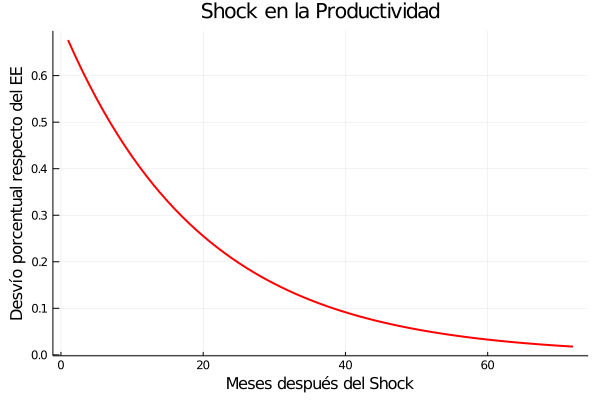

In [18]:
plt_z = plot(t,xx[:,2], xlabel="Meses después del Shock", ylabel="Desvío porcentual respecto del EE", 
               title = "Shock en la Productividad", color="red", legend=false, linewidth = 2, 
               grid = true)
display(plt_z)

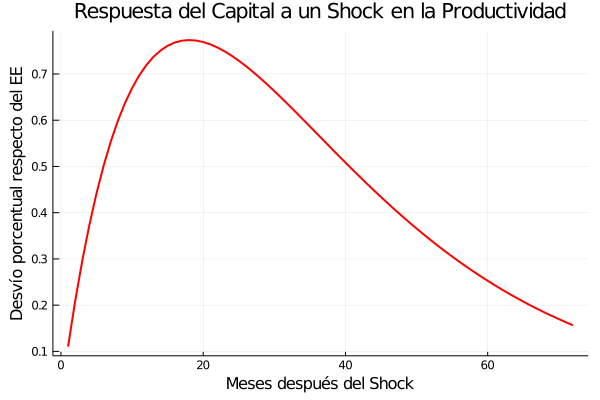

In [19]:
plt_k = plot(t,xx[:,1], xlabel="Meses después del Shock", ylabel="Desvío porcentual respecto del EE", 
            title = "Respuesta del Capital a un Shock en la Productividad", color="red", 
            legend=false, linewidth = 2, grid = true)
display(plt_k)

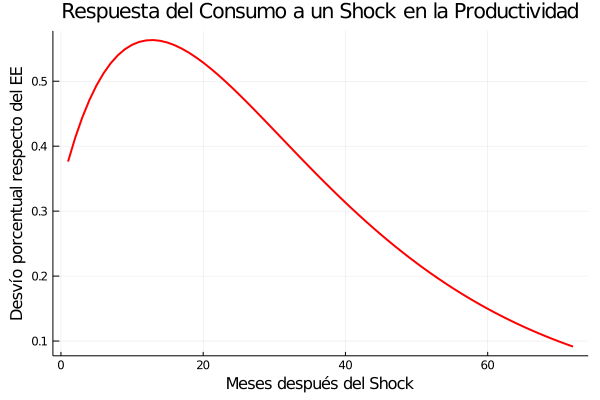

In [20]:
plt_c = plot(t,yy[:,1], xlabel="Meses después del Shock", ylabel="Desvío porcentual respecto del EE", 
            title = "Respuesta del Consumo a un Shock en la Productividad", color="red", 
            legend=false, linewidth = 2, grid = true)
display(plt_c)

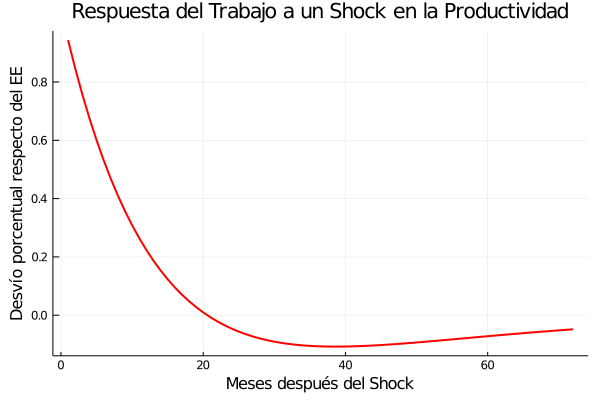

In [21]:
plt_y = plot(t,yy[:,2], xlabel="Meses después del Shock", ylabel="Desvío porcentual respecto del EE", 
            title = "Respuesta del Trabajo a un Shock en la Productividad", color="red", 
            legend=false, linewidth = 2, grid = true)
display(plt_y)

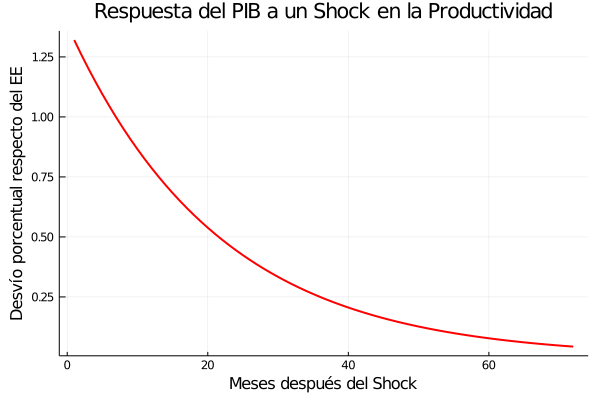

In [22]:
plt_n = plot(t,pib, xlabel="Meses después del Shock", ylabel="Desvío porcentual respecto del EE", 
            title = "Respuesta del PIB a un Shock en la Productividad", color="red", 
            legend=false, linewidth = 2, grid = true)
display(plt_n)

## Simulaciones

In [23]:
# Semilla para simulación
using Random
Random.seed!(12345);

# Shock tecnológico
periodos_sim = 600
t_sim = 1:periodos_sim 
tdrop = 50;  # Eliminamos las primeras observaciones 

ϵ = σ*randn(periodos_sim)

# Situación inicial: Estado estacionario
xx_sim = zeros(periodos_sim,nx);
yy_sim = zeros(periodos_sim,ny);

for i = 2:periodos_sim
    xx_sim[i,:] = Hx*xx_sim[i-1,:] + η*ϵ[i] 
    yy_sim[i,:] = Gx*xx_sim[i,:]
end

pib_sim = xx_sim[:,2] + α*xx_sim[:,1] + (1-α)*yy_sim[:,2];

Ahora graficamos las series simuladas:

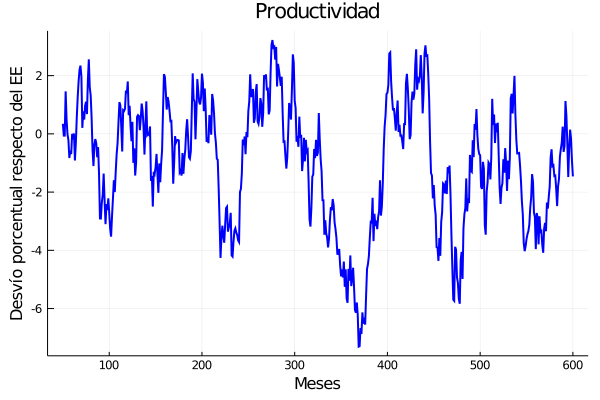

In [24]:
plt_z_sim = plot(collect(t_sim[tdrop:end]),xx_sim[tdrop:end,2], xlabel="Meses", 
            ylabel="Desvío porcentual respecto del EE", title = "Productividad", color="blue", 
            legend=false, linewidth = 2, grid = true)
display(plt_z_sim)

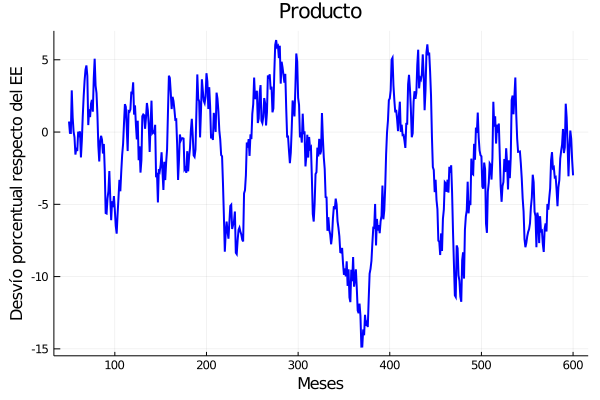

In [25]:
plt_y_sim = plot(collect(t_sim[tdrop:end]),pib_sim[tdrop:end,1], xlabel="Meses", 
            ylabel="Desvío porcentual respecto del EE", title = "Producto", color="blue", 
            legend=false, linewidth = 2, grid = true)
display(plt_y_sim)

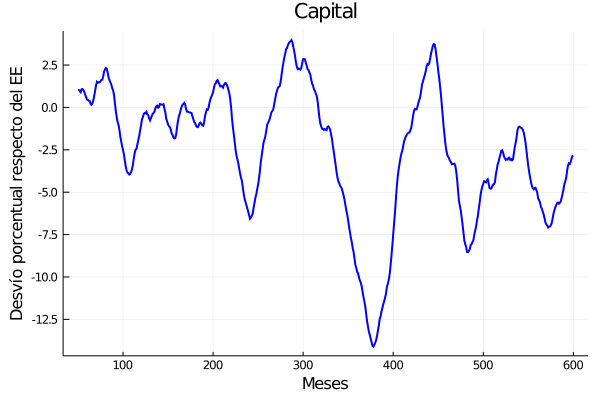

In [26]:
plt_k_sim = plot(collect(t_sim[tdrop:end]),xx_sim[tdrop:end,1], xlabel="Meses", 
            ylabel="Desvío porcentual respecto del EE", title = "Capital", color="blue", 
            legend=false, linewidth = 2, grid = true)
display(plt_k_sim)

Algunos momentos de los datos simulados:

In [37]:
varpib = var(pib_sim[tdrop:end,1])
vark = var(xx_sim[tdrop:end,1])
varc = var(yy_sim[tdrop:end,1])
cor_pib_c = cor(yy_sim[tdrop:end,1],pib_sim[tdrop:end,1])

println("La varianza del PIB es $varpib");
println("La varianza del stock de capital es $vark");
println("La varianza del consumo es $varc");
println("La correlación entre el consumo y el pib es $cor_pib_c");

La varianza del PIB es 18.60725206103514
La varianza del stock de capital es 15.334952682493359
La varianza del consumo es 8.074703686976505
La correlación entre el consumo y el pib es 0.8511815772251051


## Aproximación de segundo orden

Para implementar la aproximación de segundo orden usamos la función `solve_second_order_approx` la misma que requiere, además de la jacobiana del sismema, la hesiana de mismo. Para el modelo analizado, la solución vía aproximación de segundo orden es:

In [27]:
Gs,Hs,Gx,Hx,Gxx,Hxx,Gss,Hss = solve_second_order_approx(xee,J,H,η,nx,ny,ne);